In [1]:
import ApexUMA 
import os 

current_directory= os.getcwd()
current_directory = r"{}".format(current_directory)

# cnfg= ApexUMA.ConfigReader()
# cnfg.load_config(current_directory+ '\\LensConfiguration.json')

Using default configuration file path.
{'LensDiameter': 200.0, 'FocalLength': 100.0, 'Wavelength': 1.55, 'SubstrateIndex': 1.46, 'PillarIndex': 3.4757, 'UnitCell': {'Period': 0.4, 'Radius': [0.0625, 0.175], 'Height': 1.27, 'NumAtom': 11}, 'FullLens': {'MeshRefinementInteger': 3, 'PMLDistanceFactor': 1.0}}


C:\Program Files\Lumerical\v242\api\python\lumapi.py:895: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


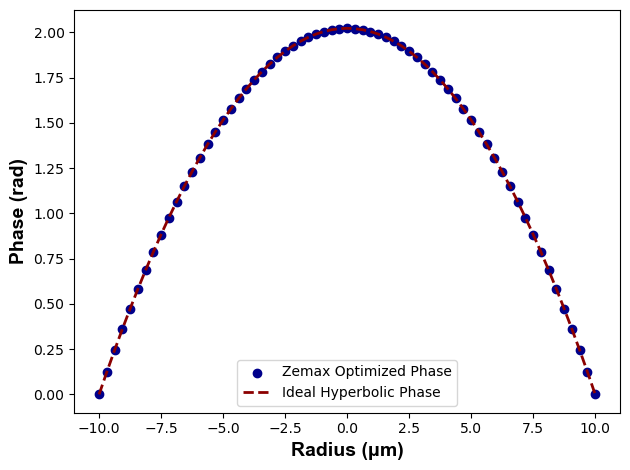

In [4]:
pd= ApexUMA.PhaseDesign()
radius_zemax, phase_zemax= pd.load_optimized_phase(file_path=current_directory+ '\\optimized_phase_d20_fl100.txt')
pd.compare_optimized_ideal()

  0%|          | 0/11 [00:00<?, ?it/s]

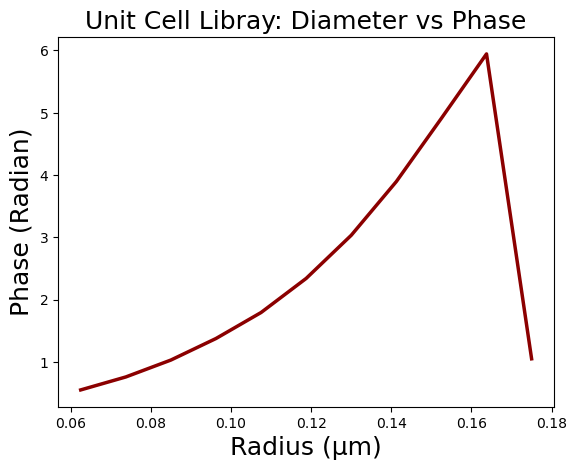

In [5]:
uc= ApexUMA.UnitCellDesign()
radius_unitcell,phase_unitcell,_= uc.make_unit_cell_library(show_plot=True)
# radius_unitcell,phase_unitcell,_= uc.load_unit_cell_library()
#print(phase_unitcell)

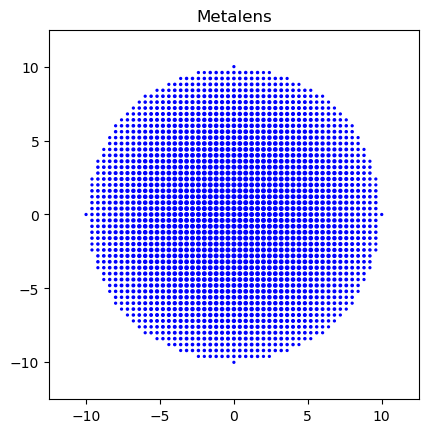

In [6]:
ld= ApexUMA.LensDesign()
x,y,radius= ld.make_lens_geometry(radius_zemax, phase_zemax, radius_unitcell, phase_unitcell, show_lens= True)
# x,y,radius= ld.make_lens_geometry()

In [2]:
fulllens= ApexUMA.FullLensSim()
fulllens.run_fdtd(x,y,radius)
fulllens.get_result_fdtd(show_plot=True)

normalized power through surface near the metalens (using direct transmission): 0.625850867639791
Focal Length: 94.3131313131313 μm, 
              
FWHM: 2.9808897984452583 μm, 
              
Overall Efficiency:0.5312576946969698, 
              
Focusing Efficiency: 0.8488566880165062, 
              
Transmission Efficiency: 0.625850867639791,
              
TotalPower through focal plane/ source power: 0.6041159599496556


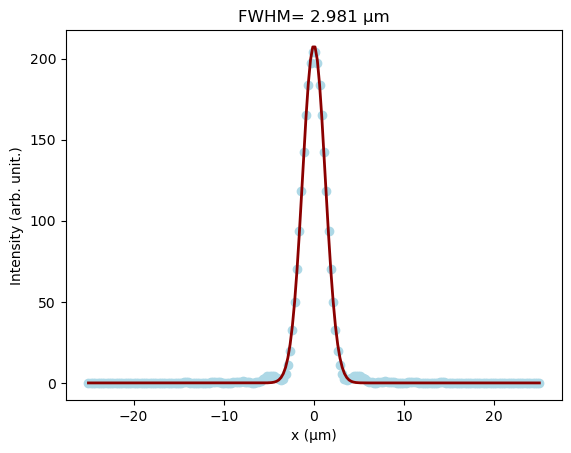

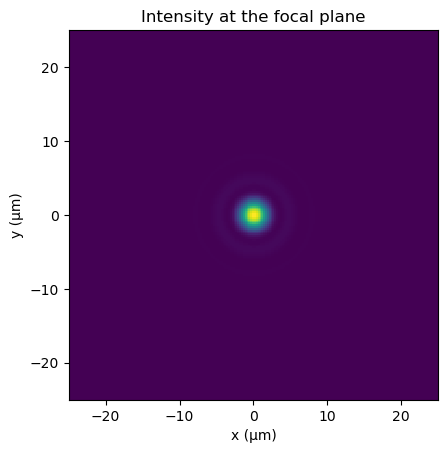

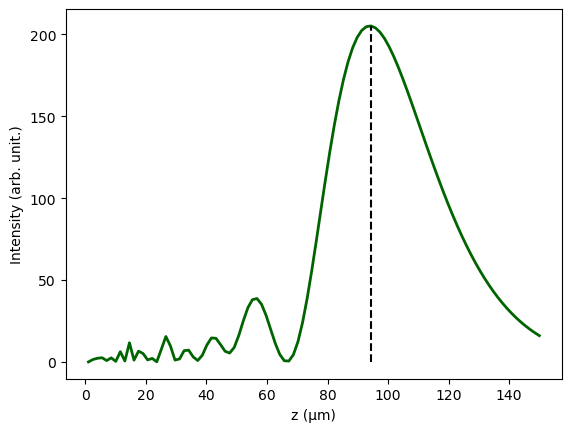

In [3]:
# fulllens.get_result_fdtd(show_plot=True)